# Exploratory Data Analysis (EDA)

Importing Libraries and reading the dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('manufacturing_data.csv')

Formating the data so that all dates are in the same format. If its not already.

In [5]:
df['recordDate'] = pd.to_datetime(df['recordDate'], errors='coerce')

Graph 1: To Vizualise the missing values in the dataset.

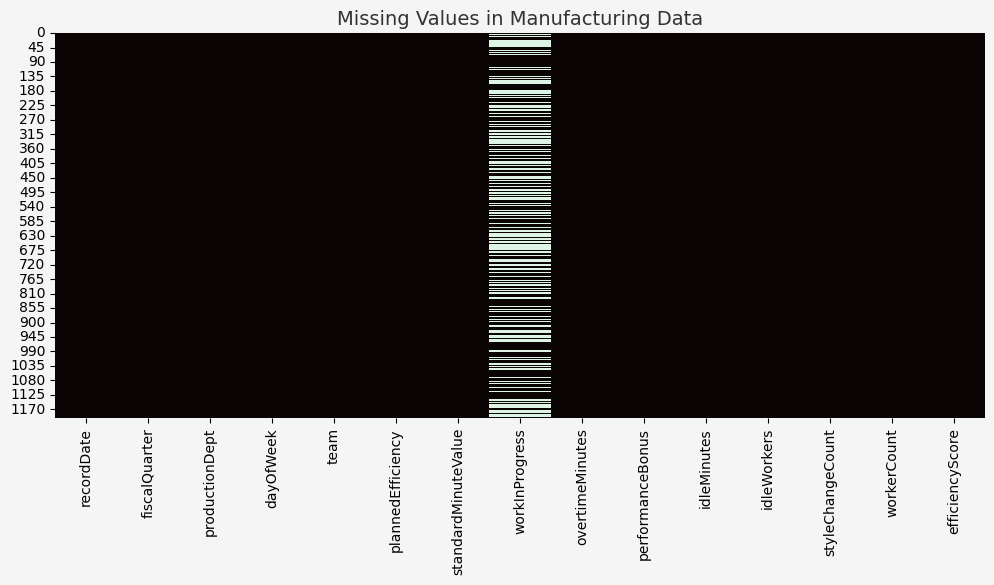

In [15]:
plt.figure(figsize=(12, 5), facecolor='#f5f5f5')
sns.heatmap(df.isnull(), cmap='mako', cbar=False)
plt.title('Missing Values in Manufacturing Data', fontsize=14, color='#333333')
plt.show()


This graphs tells us that we have missing values in the workInProgress column which needs to be handled before proceeding with model training.

Graph 2: It shows us the distribution of the effciency.

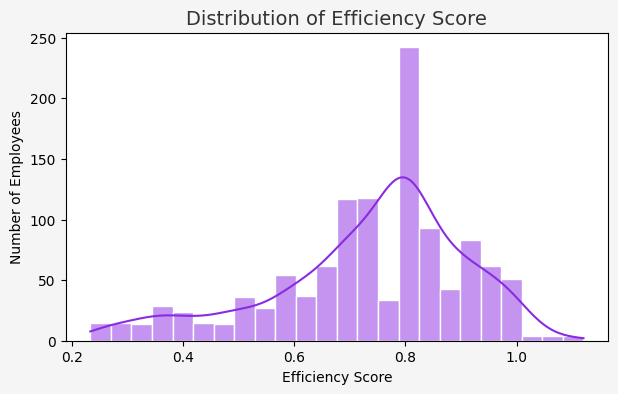

In [16]:
plt.figure(figsize=(7, 4), facecolor='#f5f5f5')  # light grey background
sns.histplot(df['efficiencyScore'], kde=True, color='#8A2BE2', edgecolor='white')  # violet tone
plt.title('Distribution of Efficiency Score', fontsize=14, color='#333333')
plt.xlabel('Efficiency Score')
plt.ylabel('Number of Employees')
plt.show()


This graphs tells us that data is skewed moderately. That tells us that most of the teams performed normally and decently.

Graph 3: It show us the distribution of frequency according to the departments.

/tmp/ipython-input-1766743389.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='productionDept', y='efficiencyScore', data=dept, palette='mako')  # elegant bluish tones


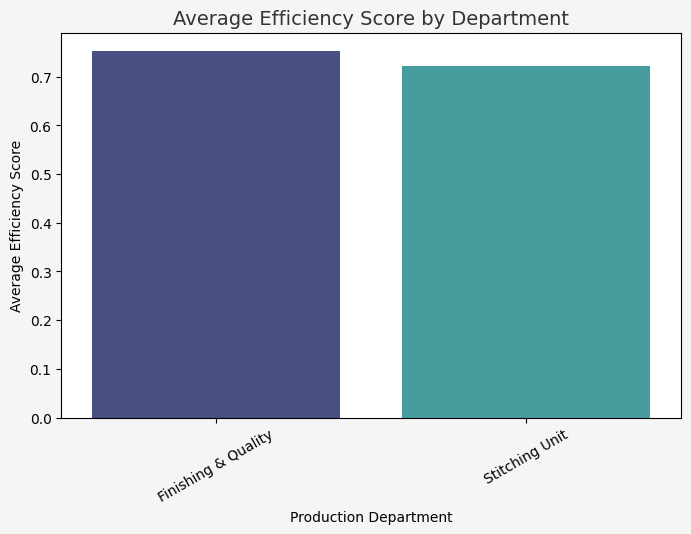

In [17]:
plt.figure(figsize=(8, 5), facecolor='#f5f5f5')  # light grey background
sns.barplot(x='productionDept', y='efficiencyScore', data=dept, palette='mako')  # elegant bluish tones
plt.title('Average Efficiency Score by Department', fontsize=14, color='#333333')
plt.xlabel('Production Department')
plt.ylabel('Average Efficiency Score')
plt.xticks(rotation=30)
plt.show()


This graphs tells us that employees in the finishing and quality departments performed better than the rest of the teams.

Graph 4: Tells us the seasonal trend in efficiency score.

/tmp/ipython-input-2079670844.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='fiscalQuarter', y='efficiencyScore', data=df, ci=None,
/tmp/ipython-input-2079670844.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fiscalQuarter', y='efficiencyScore', data=df, ci=None,


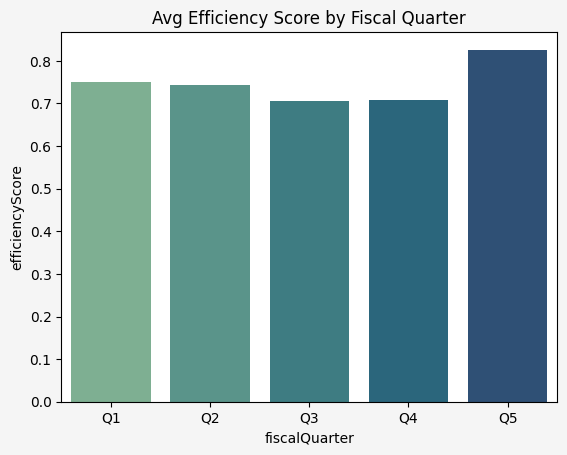

In [21]:
plt.figure(facecolor='#f5f5f5')
sns.barplot(x='fiscalQuarter', y='efficiencyScore', data=df, ci=None,
            order=['Q1','Q2','Q3','Q4','Q5'], palette='crest')
plt.title('Avg Efficiency Score by Fiscal Quarter')
plt.show()


This graphs tells us that the effciency score was a little bit stable till Q4 but then it increased significantly in Q5.

Graph 5: Tells us the frequency of employees on each day.

/tmp/ipython-input-652943682.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dayOfWeek', y='efficiencyScore', data=df, order=Days, palette=colors)


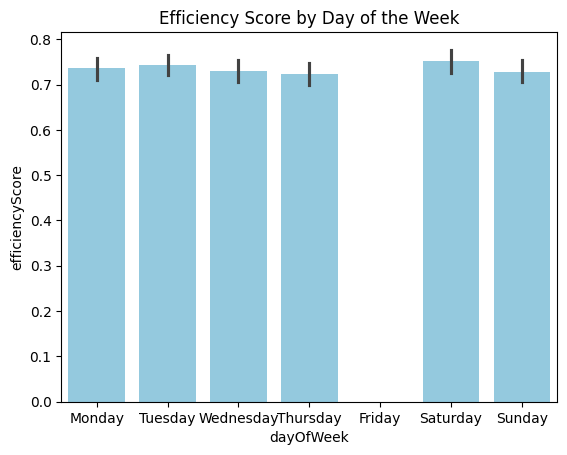

In [23]:
Days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
colors = ['skyblue' if d != 'Friday' else 'salmon' for d in Days]

sns.barplot(x='dayOfWeek', y='efficiencyScore', data=df, order=Days, palette=colors)
plt.title('Efficiency Score by Day of the Week')
plt.show()


This graphs tells us that:
1. The employees have weekoff on every friday.
2. After weekoff, every employee has a good performance i.e. on the Saturdays.

Graph 6: Efficiency Score vs Idle Minutes.

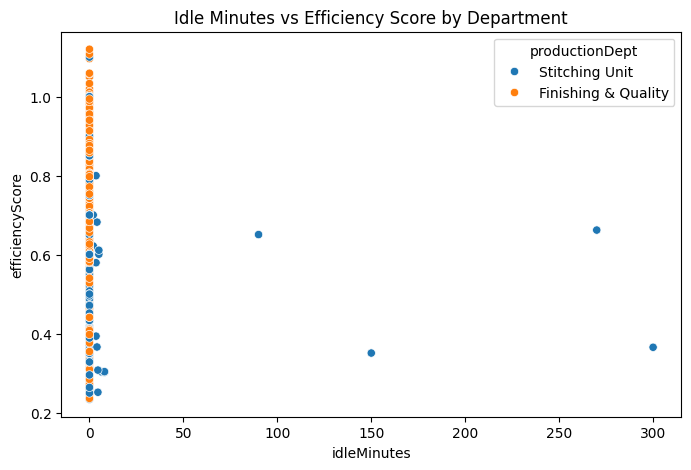

In [11]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='idleMinutes', y='efficiencyScore', hue='productionDept', data=df)
plt.title('Idle Minutes vs Efficiency Score by Department')
plt.show()

This graphs tells us that if the idle minutes are high then efficiency score is low.

Graph 7: Overtime vs Efficiency Score.

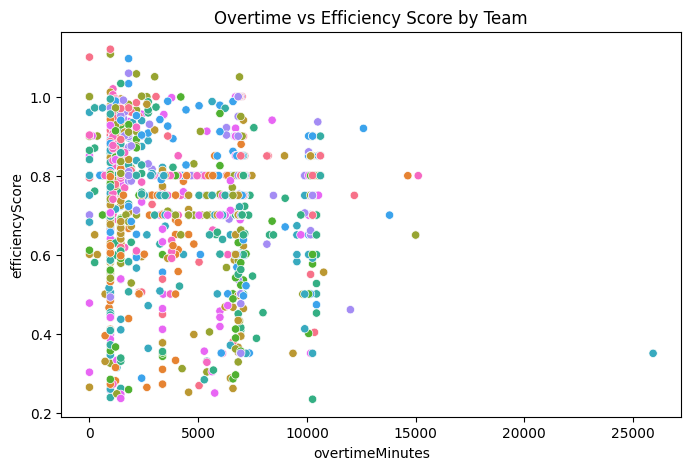

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='overtimeMinutes', y='efficiencyScore', hue='team', data=df, legend=False)
plt.title('Overtime vs Efficiency Score by Team')
plt.show()

This graphs tells us that a little bit of overtime can increase efficiency score but excess of it decreases it.

Graph 8: Tell us how team size affects efficiency score.

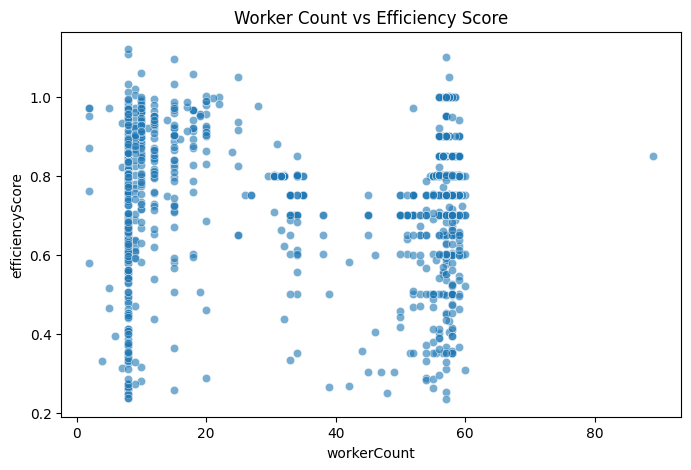

In [13]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='workerCount', y='efficiencyScore', data=df, alpha=0.6)
plt.title('Worker Count vs Efficiency Score')
plt.show()

This graph tells us that team size affects the efficiency score to a certain extent. Else increase in team size stablizes the efficiency score.

Graph 9: Correlation Heatmap

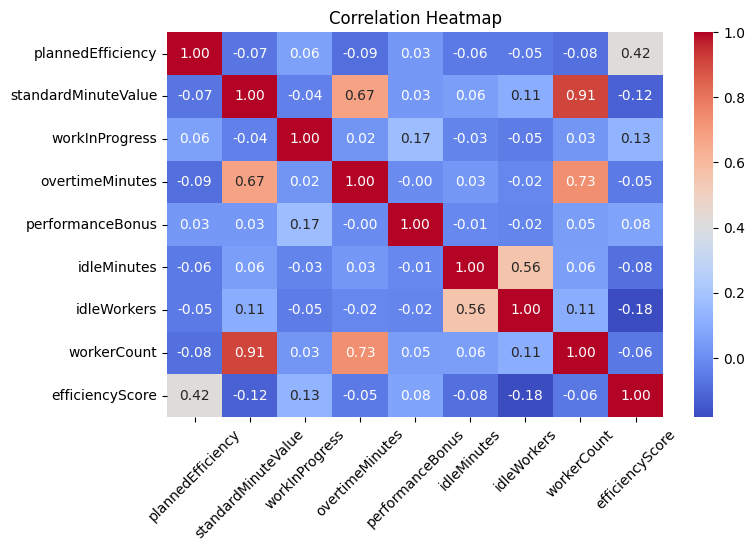

In [14]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.show()

This graphs tells us that:
1. Highest correlation between efficiency score and plannedEffciency.
2. Lowest correlation between efficiency score and idleminutes.

That means the employee with high planned effciency and low idle minutes have high efficiency score.